# Part 2: Full Data Workflow A-Z

## Data Preparation and Feature Creation

### Arithmetic Operations

In [122]:
import pandas as pd
import numpy as np

In [123]:
titanic = pd.read_csv("titanic.csv")

In [124]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [125]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [126]:
titanic.age.fillna(titanic.age.mean(), inplace = True) # Quickest and dirtiest method (mean=29.69)

In [127]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.000000,1,0,7.2500,S,NaN
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,S,NaN
3,1,1,female,35.000000,1,0,53.1000,S,C
4,0,3,male,35.000000,0,0,8.0500,S,NaN
5,0,3,male,29.699118,0,0,8.4583,Q,NaN
6,0,1,male,54.000000,0,0,51.8625,S,E
7,0,3,male,2.000000,3,1,21.0750,S,NaN
8,1,3,female,27.000000,0,2,11.1333,S,NaN
9,1,2,female,14.000000,1,0,30.0708,C,NaN


#### Add/Sub/Mul/Div of Columns

In [128]:
titanic.sibsp + titanic.parch

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [129]:
titanic.sibsp.add(titanic.parch) # Safer, due to risk of NA comparing

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [130]:
titanic["no_relat"] = titanic.sibsp.add(titanic.parch)

In [131]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [132]:
sales = pd.read_csv("sales.csv", index_col = 0)

In [133]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [134]:
sales.Mon + sales.Thu

Steven      NaN
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [135]:
sales.Mon.add(sales.Thu, fill_value=0)

Steven     34.0
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [136]:
sales["perc_Bonus"] = [0.12, 0.15, 0.10, 0.20]

In [137]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus
Steven,34,27,15,NaN,33,0.12
Mike,45,9,74,87.0,12,0.15
Andi,17,33,54,8.0,29,0.10
Paul,87,67,27,45.0,7,0.20


In [138]:
sales.Thu * sales.perc_Bonus

Steven      NaN
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [139]:
sales.Thu.mul(sales.perc_Bonus, fill_value=0)

Steven     0.00
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [140]:
sales.iloc[:, :-1].sum(axis = 1).mul(sales.perc_Bonus) # Multiply each row by the bonus column

Steven    13.08
Mike      34.05
Andi      14.10
Paul      46.60
dtype: float64

In [141]:
sales["Bonus"] = sales.iloc[:, :-1].sum(axis = 1).mul(sales.perc_Bonus)

In [142]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus,Bonus
Steven,34,27,15,NaN,33,0.12,13.08
Mike,45,9,74,87.0,12,0.15,34.05
Andi,17,33,54,8.0,29,0.10,14.10
Paul,87,67,27,45.0,7,0.20,46.60


#### Add/Sub/Mul/Div with Scaler Value

In [143]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [144]:
1912 - titanic.age

0      1890.000000
1      1874.000000
2      1886.000000
3      1877.000000
4      1877.000000
          ...     
886    1885.000000
887    1893.000000
888    1882.300882
889    1886.000000
890    1880.000000
Name: age, Length: 891, dtype: float64

In [145]:
titanic["YoB"] = titanic.age.sub(1912).mul(-1) # Age - 1912, so you need to multiply by (-1)

In [146]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,YoB
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,1890.0
1,1,1,female,38.0,1,0,71.2833,C,C,1,1874.0
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,1886.0
3,1,1,female,35.0,1,0,53.1000,S,C,1,1877.0
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,1877.0


In [147]:
fx_rate = 1.1

In [148]:
titanic["EUR_fare"] = titanic.fare.div(fx_rate)

In [149]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,YoB,EUR_fare
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,1890.0,6.590909
1,1,1,female,38.0,1,0,71.2833,C,C,1,1874.0,64.803000
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,1886.0,7.204545
3,1,1,female,35.0,1,0,53.1000,S,C,1,1877.0,48.272727
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,1877.0,7.318182


In [150]:
titanic.drop(columns = ["sibsp", "parch", "deck", "YoB", "EUR_fare"], inplace =True)

In [151]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [152]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus,Bonus
Steven,34,27,15,NaN,33,0.12,13.08
Mike,45,9,74,87.0,12,0.15,34.05
Andi,17,33,54,8.0,29,0.10,14.10
Paul,87,67,27,45.0,7,0.20,46.60


In [153]:
fixed_costs = 5

In [154]:
sales.iloc[:, :-2].sub(fixed_costs, fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Steven,29,22,10,-5.0,28
Mike,40,4,69,82.0,7
Andi,12,28,49,3.0,24
Paul,82,62,22,40.0,2


In [155]:
perc_Bonus = 0.1

In [156]:
sales.iloc[:, :-2].mul(perc_Bonus, fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Steven,3.4,2.7,1.5,0.0,3.3
Mike,4.5,0.9,7.4,8.7,1.2
Andi,1.7,3.3,5.4,0.8,2.9
Paul,8.7,6.7,2.7,4.5,0.7


In [157]:
sales.iloc[:,:-2]

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [158]:
lot_size = 10
bonus_per_lot = 1.25

In [159]:
sales.iloc[:, :-2].floordiv(lot_size, fill_value = 0).mul(bonus_per_lot).sum(axis = 1)

Steven    11.25
Mike      25.00
Andi      13.75
Paul      25.00
dtype: float64

### Transformation / Mapping

In [160]:
summer = pd.read_csv("summer.csv")

In [161]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [162]:
sample = summer.sample(n = 7, random_state = 123).sort_values(by = "Year")

In [163]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze


In [164]:
# Creating a new column with the countries, given the column "City"
city_country = {"Paris":"France", "Mexico":"Mexico", "Montreal":"Canada",
                "Moscow":"Russia", "Barcelona":"Spain", "Athens": "Greece"}

In [165]:
city_country # dict

{'Paris': 'France',
 'Mexico': 'Mexico',
 'Montreal': 'Canada',
 'Moscow': 'Russia',
 'Barcelona': 'Spain',
 'Athens': 'Greece'}

In [166]:
sample.City.map(city_country)

4196     France
11961    Mexico
11742    Mexico
13996    Canada
16229    Russia
19728     Spain
25901    Greece
Name: City, dtype: object

In [167]:
sample["Host_Country"] = sample.City.map(city_country)

In [168]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Host_Country
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze,France
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold,Mexico
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold,Mexico
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver,Canada
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze,Russia
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver,Spain
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze,Greece


In [169]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [170]:
mapper = {1:"First", 2:"Second", 3:"Third"}

In [171]:
titanic.pclass.map(mapper)

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: pclass, Length: 891, dtype: object

In [172]:
titanic.pclass = titanic.pclass.map(mapper)

In [173]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,Third,male,22.0,7.2500,S,1
1,1,First,female,38.0,71.2833,C,1
2,1,Third,female,26.0,7.9250,S,0
3,1,First,female,35.0,53.1000,S,1
4,0,Third,male,35.0,8.0500,S,0


### Conditional Transformation

In [174]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,Third,male,22.000000,7.2500,S,1
1,1,First,female,38.000000,71.2833,C,1
2,1,Third,female,26.000000,7.9250,S,0
3,1,First,female,35.000000,53.1000,S,1
4,0,Third,male,35.000000,8.0500,S,0
5,0,Third,male,29.699118,8.4583,Q,0
6,0,First,male,54.000000,51.8625,S,0
7,0,Third,male,2.000000,21.0750,S,4
8,1,Third,female,27.000000,11.1333,S,2
9,1,Second,female,14.000000,30.0708,C,1


In [175]:
titanic.no_relat == 0

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: no_relat, Length: 891, dtype: bool

In [176]:
#np.where(titanic.no_relat == 0, "Yes", "No")

In [177]:
# Condition applied to pd.Series, to transform the numpy array into a pandas series
pd.Series(np.where(titanic.no_relat == 0, "Yes", "No"))

0       No
1       No
2      Yes
3       No
4      Yes
      ... 
886    Yes
887    Yes
888     No
889    Yes
890    Yes
Length: 891, dtype: object

In [178]:
titanic["alone"] = pd.Series(np.where(titanic.no_relat == 0, "Yes", "No"))

In [179]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,no_relat,alone
0,0,Third,male,22.000000,7.2500,S,1,No
1,1,First,female,38.000000,71.2833,C,1,No
2,1,Third,female,26.000000,7.9250,S,0,Yes
3,1,First,female,35.000000,53.1000,S,1,No
4,0,Third,male,35.000000,8.0500,S,0,Yes
5,0,Third,male,29.699118,8.4583,Q,0,Yes
6,0,First,male,54.000000,51.8625,S,0,Yes
7,0,Third,male,2.000000,21.0750,S,4,No
8,1,Third,female,27.000000,11.1333,S,2,No
9,1,Second,female,14.000000,30.0708,C,1,No


In [180]:
titanic["child"] = pd.Series(np.where(titanic.age < 18, "Yes", "No"))

In [181]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child
0,0,Third,male,22.000000,7.2500,S,1,No,No
1,1,First,female,38.000000,71.2833,C,1,No,No
2,1,Third,female,26.000000,7.9250,S,0,Yes,No
3,1,First,female,35.000000,53.1000,S,1,No,No
4,0,Third,male,35.000000,8.0500,S,0,Yes,No
5,0,Third,male,29.699118,8.4583,Q,0,Yes,No
6,0,First,male,54.000000,51.8625,S,0,Yes,No
7,0,Third,male,2.000000,21.0750,S,4,No,Yes
8,1,Third,female,27.000000,11.1333,S,2,No,No
9,1,Second,female,14.000000,30.0708,C,1,No,Yes


### Discretization and Binning with pd.cut() (Part 1)

Sometimes you want to convert continuous numerical data into "bins".

We have done this before with conditional transformation to split children and adults ("yes" and "no" categories)!

In [182]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child
0,0,Third,male,22.000000,7.2500,S,1,No,No
1,1,First,female,38.000000,71.2833,C,1,No,No
2,1,Third,female,26.000000,7.9250,S,0,Yes,No
3,1,First,female,35.000000,53.1000,S,1,No,No
4,0,Third,male,35.000000,8.0500,S,0,Yes,No
5,0,Third,male,29.699118,8.4583,Q,0,Yes,No
6,0,First,male,54.000000,51.8625,S,0,Yes,No
7,0,Third,male,2.000000,21.0750,S,4,No,Yes
8,1,Third,female,27.000000,11.1333,S,2,No,No
9,1,Second,female,14.000000,30.0708,C,1,No,Yes


In [183]:
age_bins = [0, 10, 18, 30, 55, 100]

In [184]:
cuts = pd.cut(x=titanic.age, bins=age_bins, right = False) # Does not include the rightmost edge

In [185]:
cuts

0      [18, 30)
1      [30, 55)
2      [18, 30)
3      [30, 55)
4      [30, 55)
         ...   
886    [18, 30)
887    [18, 30)
888    [18, 30)
889    [18, 30)
890    [30, 55)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64]): [[0, 10) < [10, 18) < [18, 30) < [30, 55) < [55, 100)]

In [186]:
cuts.value_counts()

[18, 30)     448
[30, 55)     288
[0, 10)       62
[10, 18)      51
[55, 100)     42
Name: age, dtype: int64

In [187]:
titanic["age_cut"] = cuts

In [188]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cut
0,0,Third,male,22.0,7.2500,S,1,No,No,"[18, 30)"
1,1,First,female,38.0,71.2833,C,1,No,No,"[30, 55)"
2,1,Third,female,26.0,7.9250,S,0,Yes,No,"[18, 30)"
3,1,First,female,35.0,53.1000,S,1,No,No,"[30, 55)"
4,0,Third,male,35.0,8.0500,S,0,Yes,No,"[30, 55)"


In [189]:
titanic.groupby("age_cut").survived.mean()
# Not very linear. If it were, it would be a candidate for machine learning linear regression (age vs. survival rate).
# Since it isn't the case, just transform the numerical column into a categorical column.

age_cut
[0, 10)      0.612903
[10, 18)     0.450980
[18, 30)     0.328125
[30, 55)     0.420139
[55, 100)    0.309524
Name: survived, dtype: float64

In [190]:
group_names = ["child", "teenager", "young_adult", "adult", "elderly"]

In [191]:
pd.cut(x=titanic.age, bins=age_bins, right = False, labels = group_names)

0      young_adult
1            adult
2      young_adult
3            adult
4            adult
          ...     
886    young_adult
887    young_adult
888    young_adult
889    young_adult
890          adult
Name: age, Length: 891, dtype: category
Categories (5, object): [child < teenager < young_adult < adult < elderly]

In [192]:
titanic["age_cut"] = pd.cut(x=titanic.age, bins=age_bins, right = False, labels = group_names)

In [193]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cut
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult
1,1,First,female,38.000000,71.2833,C,1,No,No,adult
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult
3,1,First,female,35.000000,53.1000,S,1,No,No,adult
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult
5,0,Third,male,29.699118,8.4583,Q,0,Yes,No,young_adult
6,0,First,male,54.000000,51.8625,S,0,Yes,No,adult
7,0,Third,male,2.000000,21.0750,S,4,No,Yes,child
8,1,Third,female,27.000000,11.1333,S,2,No,No,young_adult
9,1,Second,female,14.000000,30.0708,C,1,No,Yes,teenager


In [194]:
titanic.age_cut

0      young_adult
1            adult
2      young_adult
3            adult
4            adult
          ...     
886    young_adult
887    young_adult
888    young_adult
889    young_adult
890          adult
Name: age_cut, Length: 891, dtype: category
Categories (5, object): [child < teenager < young_adult < adult < elderly]

### Discretization and Binning with pd.cut() (Part 2)

In [195]:
titanic.fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [196]:
pd.cut(x=titanic.fare, bins=5, precision= 3) # Split data into 5 bins, with 3 decimal values

0      (-0.512, 102.466]
1      (-0.512, 102.466]
2      (-0.512, 102.466]
3      (-0.512, 102.466]
4      (-0.512, 102.466]
             ...        
886    (-0.512, 102.466]
887    (-0.512, 102.466]
888    (-0.512, 102.466]
889    (-0.512, 102.466]
890    (-0.512, 102.466]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (307.398, 409.863] < (409.863, 512.329]]

In [197]:
titanic["fare_cut"] = pd.cut(titanic.fare, 5, precision= 0, right=True)
# Right=True, due to the negative value on the left!!!
# That value shows up because all bins are created with the same size!!!

In [198]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cut,fare_cut
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,"(-1.0, 102.0]"
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,"(-1.0, 102.0]"
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,"(-1.0, 102.0]"
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,"(-1.0, 102.0]"
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,"(-1.0, 102.0]"
5,0,Third,male,29.699118,8.4583,Q,0,Yes,No,young_adult,"(-1.0, 102.0]"
6,0,First,male,54.000000,51.8625,S,0,Yes,No,adult,"(-1.0, 102.0]"
7,0,Third,male,2.000000,21.0750,S,4,No,Yes,child,"(-1.0, 102.0]"
8,1,Third,female,27.000000,11.1333,S,2,No,No,young_adult,"(-1.0, 102.0]"
9,1,Second,female,14.000000,30.0708,C,1,No,Yes,teenager,"(-1.0, 102.0]"


In [199]:
titanic.fare_cut.value_counts()

(-1.0, 102.0]     838
(102.0, 205.0]     33
(205.0, 307.0]     17
(410.0, 512.0]      3
(307.0, 410.0]      0
Name: fare_cut, dtype: int64

### Discretization and Binning with pd.qcut() 

In [200]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cut,fare_cut
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,"(-1.0, 102.0]"
1,1,First,female,38.0,71.2833,C,1,No,No,adult,"(-1.0, 102.0]"
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,"(-1.0, 102.0]"
3,1,First,female,35.0,53.1000,S,1,No,No,adult,"(-1.0, 102.0]"
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,"(-1.0, 102.0]"


In [201]:
pd.qcut(x=titanic.fare, q=5) # qcut() tries to make equal-sized bins, i.e., each bin will be of a different size

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [202]:
titanic["fare_cut"] = pd.qcut(titanic.fare, 5)

In [203]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cut,fare_cut
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,"(-0.001, 7.854]"
1,1,First,female,38.0,71.2833,C,1,No,No,adult,"(39.688, 512.329]"
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,"(7.854, 10.5]"
3,1,First,female,35.0,53.1000,S,1,No,No,adult,"(39.688, 512.329]"
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,"(7.854, 10.5]"


In [204]:
titanic.fare_cut.value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: fare_cut, dtype: int64

In [205]:
# Customized quantities for bins -> (0%-10%], (10%-25%], (25%-50%], (50%-90%], (90%-100%]
pd.qcut(x=titanic.fare, q=[0, 0.1, 0.25, 0.5, 0.9, 1], precision = 0)

0       (-0.1, 7.6]
1      (14.5, 78.0]
2       (7.9, 14.5]
3      (14.5, 78.0]
4       (7.9, 14.5]
           ...     
886     (7.9, 14.5]
887    (14.5, 78.0]
888    (14.5, 78.0]
889    (14.5, 78.0]
890      (7.6, 7.9]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.1, 7.6] < (7.6, 7.9] < (7.9, 14.5] < (14.5, 78.0] < (78.0, 512.3]]

In [206]:
fare_labels =["very_cheap", "cheap", "moderate", "exp", "very_exp"]

In [207]:
titanic["fare_cut"] =  pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.9, 1], precision = 0, labels = fare_labels)

In [208]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cut,fare_cut
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,very_cheap
1,1,First,female,38.0,71.2833,C,1,No,No,adult,exp
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,moderate
3,1,First,female,35.0,53.1000,S,1,No,No,adult,exp
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,moderate


In [209]:
titanic.fare_cut.value_counts()

exp           357
moderate      224
cheap         131
very_cheap     92
very_exp       87
Name: fare_cut, dtype: int64

In [210]:
titanic.groupby(["age_cut", "fare_cut"]).survived.mean().unstack()

fare_cut,very_cheap,cheap,moderate,exp,very_exp
age_cut,,,,,
child,NaN,NaN,0.875000,0.568627,0.666667
teenager,0.333333,0.500000,0.500000,0.263158,1.000000
young_adult,0.180328,0.269231,0.228070,0.450000,0.655172
adult,0.000000,0.050000,0.320513,0.488000,0.809524
elderly,0.000000,0.000000,0.250000,0.272727,0.714286


### Caps and Floors

Some statistical and machine learning tools are very sensitive to outliers.

At this point, we have learned how to handle outliers with INCORRECT DATA (NB11 - Cleaning Data), by fixing the value (fat-finger cases).

A way to remove outliers with CORRECT DATA is through caps and floors.

In [211]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cut,fare_cut
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,very_cheap
1,1,First,female,38.0,71.2833,C,1,No,No,adult,exp
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,moderate
3,1,First,female,35.0,53.1000,S,1,No,No,adult,exp
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,moderate


In [212]:
import matplotlib.pyplot as plt

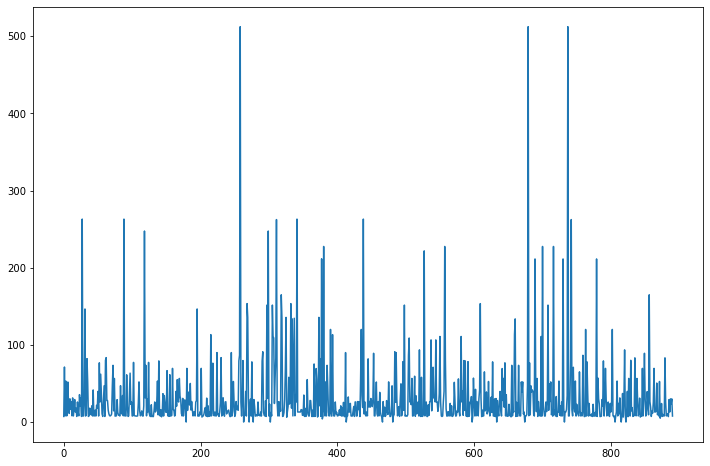

In [213]:
titanic.fare.plot(figsize = (12,8))
plt.show()

# Remember the last bins you created through qcut(). The last bin was (78.0, 512.3] and only represented 10% of the data!!!

In [214]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [215]:
titanic.fare.sort_values(ascending = False)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
         ...   
277      0.0000
633      0.0000
302      0.0000
597      0.0000
271      0.0000
Name: fare, Length: 891, dtype: float64

In [216]:
fare_cap = 250

In [217]:
titanic.loc[titanic.fare > fare_cap, "fare"] = fare_cap

In [218]:
fare_floor = 5

In [219]:
titanic.loc[titanic.fare < fare_floor, "fare"] = fare_floor

In [220]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cut,fare_cut
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,very_cheap
1,1,First,female,38.0,71.2833,C,1,No,No,adult,exp
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,moderate
3,1,First,female,35.0,53.1000,S,1,No,No,adult,exp
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,moderate


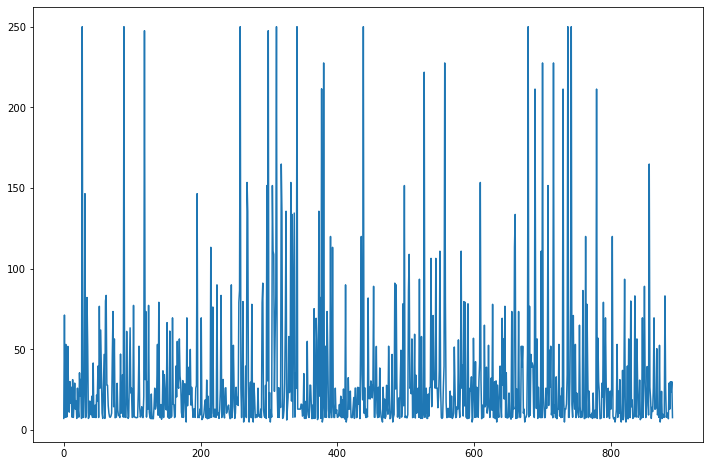

In [221]:
titanic.fare.plot(figsize = (12,8))
plt.show()

### Scaling / Standardization

In [222]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cut,fare_cut
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,very_cheap
1,1,First,female,38.0,71.2833,C,1,No,No,adult,exp
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,moderate
3,1,First,female,35.0,53.1000,S,1,No,No,adult,exp
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,moderate


In [223]:
titanic.describe()

,survived,age,fare,no_relat
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,31.320089,0.904602
std,0.486592,13.002015,42.517981,1.613459
min,0.000000,0.420000,5.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000
50%,0.000000,29.699118,14.454200,0.000000
75%,1.000000,35.000000,31.000000,1.000000
max,1.000000,80.000000,250.000000,10.000000


In [224]:
import matplotlib.pyplot as plt

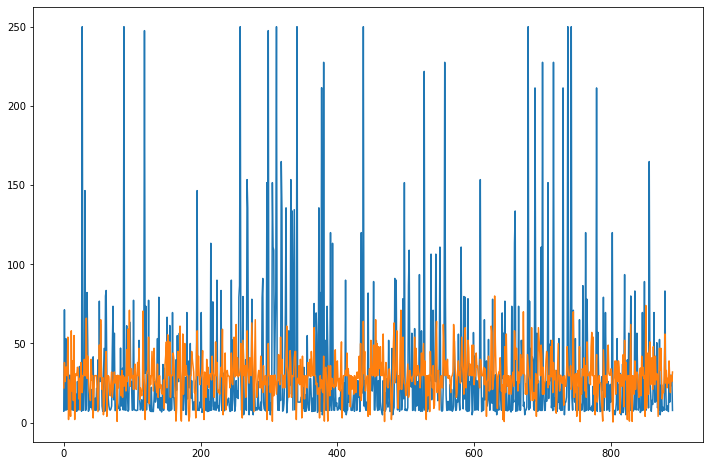

In [225]:
titanic.fare.plot(figsize = (12,8))
titanic.age.plot(figsize = (12,8))
plt.show()

In [226]:
mean_age = titanic.age.mean() # 29.69
mean_fare = titanic.fare.mean() # 31.32

In [227]:
std_age = titanic.age.std() # 13.00
std_fare = titanic.fare.std() # 42.51

In [232]:
# STANDARDIZING DATA (MEAN=0, STD=1)
titanic["age_z"] = round((titanic.age-mean_age) / std_age,2)
titanic["fare_z"] = round((titanic.fare-mean_fare) / std_fare,2)

In [233]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cut,fare_cut,age_z,fare_z
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,very_cheap,-0.59,-0.57
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,exp,0.64,0.94
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,moderate,-0.28,-0.55
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,exp,0.41,0.51
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,moderate,0.41,-0.55
5,0,Third,male,29.699118,8.4583,Q,0,Yes,No,young_adult,moderate,0.00,-0.54
6,0,First,male,54.000000,51.8625,S,0,Yes,No,adult,exp,1.87,0.48
7,0,Third,male,2.000000,21.0750,S,4,No,Yes,child,exp,-2.13,-0.24
8,1,Third,female,27.000000,11.1333,S,2,No,No,young_adult,moderate,-0.21,-0.47
9,1,Second,female,14.000000,30.0708,C,1,No,Yes,teenager,exp,-1.21,-0.03


In [234]:
round(titanic.describe(),2)

,survived,age,fare,no_relat,age_z,fare_z
count,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,29.70,31.32,0.90,0.00,0.00
std,0.49,13.00,42.52,1.61,1.00,1.00
min,0.00,0.42,5.00,0.00,-2.25,-0.62
25%,0.00,22.00,7.91,0.00,-0.59,-0.55
50%,0.00,29.70,14.45,0.00,0.00,-0.40
75%,1.00,35.00,31.00,1.00,0.41,-0.01
max,1.00,80.00,250.00,10.00,3.87,5.14


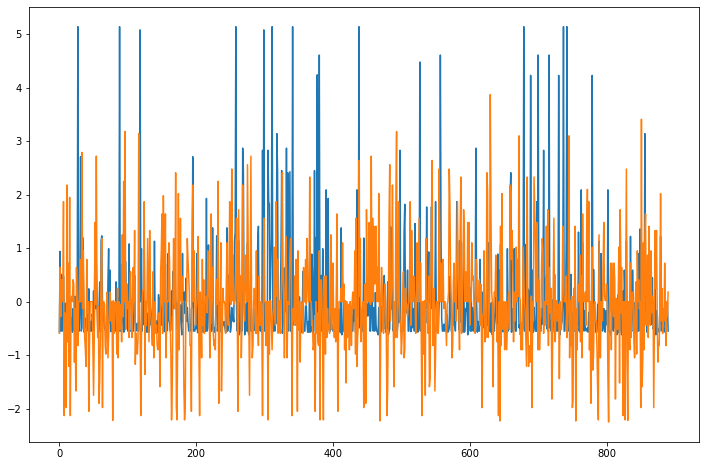

In [235]:
titanic.fare_z.plot(figsize = (12,8))
titanic.age_z.plot(figsize = (12,8))
plt.show()

In [236]:
#titanic.to_csv("titanic_prep.csv", index = False)

In [237]:
titanic.head() # Z-Scores

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cut,fare_cut,age_z,fare_z
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,very_cheap,-0.59,-0.57
1,1,First,female,38.0,71.2833,C,1,No,No,adult,exp,0.64,0.94
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,moderate,-0.28,-0.55
3,1,First,female,35.0,53.1000,S,1,No,No,adult,exp,0.41,0.51
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,moderate,0.41,-0.55


### Creating Dummy Variables

In [245]:
titanic.head()

,survived,pclass,sex,fare,embarked,no_relat,age_cut
0,0,Third,male,7.2500,S,1,young_adult
1,1,First,female,71.2833,C,1,adult
2,1,Third,female,7.9250,S,0,young_adult
3,1,First,female,53.1000,S,1,adult
4,0,Third,male,8.0500,S,0,adult


In [241]:
titanic.drop(labels = ["age", "alone", "child", "age_z", "fare_z", "fare_cut"], axis = 1, inplace = True)

In [242]:
titanic.head()

,survived,pclass,sex,fare,embarked,no_relat,age_cut
0,0,Third,male,7.2500,S,1,young_adult
1,1,First,female,71.2833,C,1,adult
2,1,Third,female,7.9250,S,0,young_adult
3,1,First,female,53.1000,S,1,adult
4,0,Third,male,8.0500,S,0,adult


In [257]:
pd.get_dummies(titanic, columns = ["sex"], drop_first=False)

,survived,pclass,fare,embarked,no_relat,age_cut,sex_female,sex_male
0,0,Third,7.2500,S,1,young_adult,0,1
1,1,First,71.2833,C,1,adult,1,0
2,1,Third,7.9250,S,0,young_adult,1,0
3,1,First,53.1000,S,1,adult,1,0
4,0,Third,8.0500,S,0,adult,0,1
...,...,...,...,...,...,...,...,...
886,0,Second,13.0000,S,0,young_adult,0,1
887,1,First,30.0000,S,0,young_adult,1,0
888,0,Third,23.4500,S,3,young_adult,1,0
889,1,First,30.0000,C,0,young_adult,0,1


In [247]:
# pd.get_dummies() converts categorical data into numerical data
titanic_d = pd.get_dummies(titanic, columns = ["sex", "pclass", "embarked", "age_cut"], drop_first=True)

In [248]:
titanic_d.head()

,survived,fare,no_relat,sex_male,pclass_Second,pclass_Third,embarked_Q,embarked_S,age_cut_teenager,age_cut_young_adult,age_cut_adult,age_cut_elderly
0,0,7.2500,1,1,0,1,0,1,0,1,0,0
1,1,71.2833,1,0,0,0,0,0,0,0,1,0
2,1,7.9250,0,0,0,1,0,1,0,1,0,0
3,1,53.1000,1,0,0,0,0,1,0,0,1,0
4,0,8.0500,0,1,0,1,0,1,0,0,1,0


In [249]:
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   survived             891 non-null    int64  
 1   fare                 891 non-null    float64
 2   no_relat             891 non-null    int64  
 3   sex_male             891 non-null    uint8  
 4   pclass_Second        891 non-null    uint8  
 5   pclass_Third         891 non-null    uint8  
 6   embarked_Q           891 non-null    uint8  
 7   embarked_S           891 non-null    uint8  
 8   age_cut_teenager     891 non-null    uint8  
 9   age_cut_young_adult  891 non-null    uint8  
 10  age_cut_adult        891 non-null    uint8  
 11  age_cut_elderly      891 non-null    uint8  
dtypes: float64(1), int64(2), uint8(9)
memory usage: 28.8 KB


### String Operations

In [250]:
import pandas as pd

In [251]:
summer = pd.read_csv("summer.csv")

In [252]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [253]:
summer.Athlete = summer.Athlete.str.title()

In [254]:
summer.Athlete.str.split(", ", n = 1, expand = True)

,0,1
0,Hajos,Alfred
1,Herschmann,Otto
2,Drivas,Dimitrios
3,Malokinis,Ioannis
4,Chasapis,Spiridon
...,...,...
31160,Janikowski,Damian
31161,Rezaei,Ghasem Gholamreza
31162,Totrov,Rustam
31163,Aleksanyan,Artur


In [255]:
summer[["Surname", "First_Name"]] = summer.Athlete.str.split(", ", n = 1, expand = True)

In [256]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Surname,First_Name
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon


In [258]:
summer["Surname"] = summer.Surname.str.strip()

In [259]:
summer["First_Name"] = summer.First_Name.str.strip()

In [260]:
summer.drop(columns = "Athlete")

,Year,City,Sport,Discipline,Country,Gender,Event,Medal,Surname,First_Name
0,1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon
...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze,Janikowski,Damian
31161,2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold,Rezaei,Ghasem Gholamreza
31162,2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver,Totrov,Rustam
31163,2012,London,Wrestling,Wrestling Freestyle,ARM,Men,Wg 96 KG,Bronze,Aleksanyan,Artur
